In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.2
IPython 5.1.0

scipy 0.18.1
sklearn 0.18
numpy 1.11.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

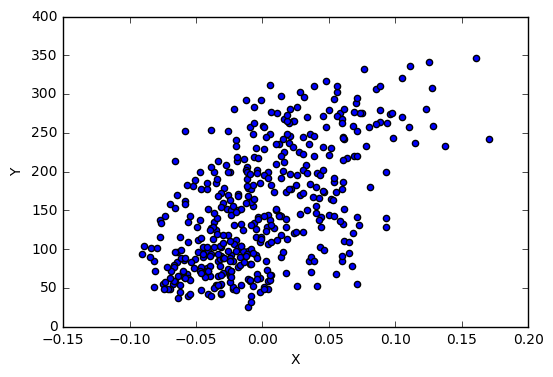

In [3]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
class SingleNeuron(object):

    def __init__(self):
        self._w = 0     # 가중치 w
        self._b = 0     # 바이어스 b
        self._x = 0     # 입력값 x

    def set_params(self, w, b):
        """가중치와 바이어스를 저장합니다."""
        self._w = w
        self._b = b

    def forpass(self, x):
        """정방향 수식 w * x + b 를 계산하고 결과를 리턴합니다."""
        self._x = x
        _y_hat = self._w * self._x + self._b
        return _y_hat
    
    def backprop(self, err):
        """에러를 입력받아 가중치와 바이어스의 변화율을 곱하고 평균을 낸 후 감쇠된 변경량을 저장합니다."""
        m = len(self._x)
        self._w_grad = 0.1 * np.sum(err * self._x) / m
        self._b_grad = 0.1 * np.sum(err * 1) / m

    def update_grad(self):
        """계산된 파라메타의 변경량을 업데이트하여 새로운 파라메타를 셋팅합니다."""
        self.set_params(self._w + self._w_grad, self._b + self._b_grad)

In [5]:
n1 = SingleNeuron()

In [6]:
n1.set_params(5, 1)
n1.forpass(3)

16

In [7]:
n1.set_params(6, 1)
n1.forpass(3)

19

In [8]:
n1.set_params(5, 1)
n1.forpass(4)

21

In [9]:
n1.set_params(5, 2)
n1.forpass(3)

17

In [10]:
n1.set_params(5, 0)
n1.forpass(3)

15

In [11]:
n1.set_params(5, 1)
for i in range(30000):
    y_hat = n1.forpass(diabetes.data[:, 2])
    error = diabetes.target - y_hat
    n1.backprop(error)
    n1.update_grad()
print('Final W', n1._w)
print('Final b', n1._b)

Final W 948.370777729
Final b 152.133484163


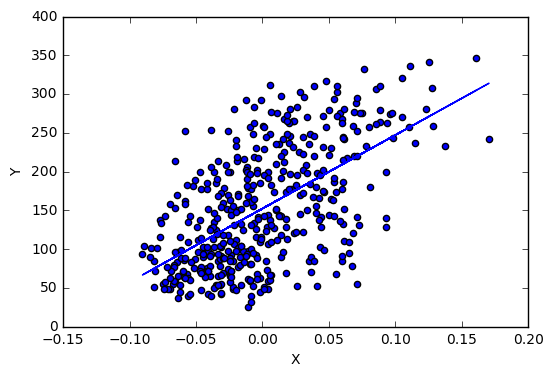

In [12]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.plot(diabetes.data[:, 2], diabetes.data[:, 2]*n1._w + n1._b)
plt.xlabel('X')
plt.ylabel('Y')

In [13]:
from sklearn import linear_model

sgd_regr = linear_model.SGDRegressor(n_iter=30000, penalty='none')
sgd_regr.fit(diabetes.data[:, 2].reshape(-1, 1), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 948.18763899] [ 152.1296324]


In [14]:
print(diabetes.data[:, 2][:10])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215]


In [15]:
print(diabetes.data[:, 2][:10].reshape(-1, 1))

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]]


In [16]:
sgd_regr = linear_model.LinearRegression()
sgd_regr.fit(np.vstack(diabetes.data[:, 2]), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

Coefficients:  [ 949.43526038] 152.133484163
